In [41]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [42]:
pd.set_option('display.max_columns',None)

In [43]:
df = pd.read_csv('zillow_data copy.csv')
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,329121.0,334059.0,338019.0,346657.0,354457.0,361917.0,369769.0,376112.0,381673.0,386586.0,394154.0,402687.0,412006.0,420541.0,429242.0,436291.0,442139.0,447655.0,452725.0,457455.0,461020.0,465658.0,469811.0,475268.0,478912.0,482464.0,484481.0,488259.0,493127.0,499165.0,503717.0,507932.0,511068.0,514280.0,518252.0,522487.0,527352.0,531284.0,535317.0,539349.0,549450.0,567133.0,588505.0,605851.0,613242.0,617110.0,619549.0,625388.0,631255.0,636089.0,639742.0,643306.0,647193.0,652314.0,659961.0,669842.0,683972.0,696806.0,708743.0,716797.0,728843.0,739511.0,759399.0,771571.0,785979.0,795559.0,805064.0,814587.0,817033.0,832764.0,850933.0,876511.0,901911.0,921178.0,927869.0,922251.0,924475.0,931610.0,934145.0,909286.0,874103.0,840213.0,841253.0,864029.0,878088.0,880955.0,875206.0,881249.0,884836.0,877242.0,872894.0,865069.0,888219.0,909058.0,932691.0,932638.0,933780.0,929386.0,935242.0,949011.0,950769.0,940471.0,901618.0,887671.0,894583.0,898397.0,891086.0,854973.0,823871.0,7

In [44]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[9:], format='%Y-%m')

In [45]:
df.columns = list(df.columns[:9]) + list(get_datetimes(df))

In [46]:
#Only rows within the top states of the northeast US
df = df[df['State'].isin(['NY', 'PA', 'NJ', 'MA', 'CT'])]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00,2001-09-30 00:00:00,2001-10-31 00:00:00,2001-11-30 00:00:00,2001-12-31 00:00:00,2002-01-31 00:00:00,2002-02-28 00:00:00,2002-03-31 00:00:00,2002-04-30 00:00:00,2002-05-31 00:00:00,2002-06-30 00:00:00,2002-07-31 00:00:00,2002-08-31 00:00:00,2002-09-30 00:00:00,2002-10-31 00:00:00,2002-11-30 00:00:00,2002-12-31 00:00:00,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,2003-05-31 00:00:00,2003-06-30 00:00:00,2003-07-31 00:00:00,2003-08-31 00:00:00,2003-09-30 00:00:00,2003-10-31 00:00:00,2003-11-30 00:00:00,2003-12-31 00:00:00,2004-01-31 00:00:00,2004-02-29 00:00:00,2004-03-31 00:00:00,2004-04-30 00:00:00,2004-05-31 00:00:00,2004-06-30 00:00:00,2004-07-31 00:00:00,2004-08-31 00:00:00,2004-09-30 00:00:00,2004-10-31 00:00:00,2004-11-30 00:00:00,2004-12-31 00:00:00,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,2005-10-31 00:00:00,2005-11-30 00:00:00,2005-12-31 00:00:00,2006-01-31 00:00:00,2006-02-28 00:00:00,2006-03-31 00:00:00,2006-04-30 00:00:00,2006-05-31 00:00:00,2006-06-30 00:00:00,2006-07-31 00:00:00,2006-08-31 00:00:00,2006-09-30 00:00:00,2006-10-31 00:00:00,2006-11-30 00:00:00,2006-12-31 00:00:00,2007-01-31 00:00:00,2007-02-28 00:00:00,2007-03-31 00:00:00,2007-04-30 00:00:00,2007-05-31 00:00:00,2007-06-30 00:00:00,2007-07-31 00:00:00,2007-08-31 00:00:00,2007-09-30 00:00:00,2007-10-31 00:00:00,2007-11-30 00:00:00,2007-12-31 00:00:00,2008-01-31 00:00:00,2008-02-29 00:00:00,2008-03-31 00:00:00,2008-04-30 00:00:00,2008-05-31 00:00:00,2008-06-30 00:00:00,2008-07-31 00:00:00,2008-08-31 00:00:00,2008-09-30 00:00:00,2008-10-31 00:00:00,2008-11-30 00:00:00,2008-12-31 00:00:00,2009-01-31 00:00:00,2009-02-28 00:00:00,2009-03-31 00:00:00,2009-04-30 00:00:00,2009-05-31 00:00:00,2009-06-30 00:00:00,2009-07-31 00:00:00,2009-08-31 00:00:00,2009-09-30 00:00:00,2009-10-31 00:00:00,2009-11-30 00:00:00,2009-12-31 00:00:00,2010-01-31 00:00:00,2010-02-28 00:00:00,2010-03-31 00:00:00,2010-04-30 00:00:00,2010-05-31 00:00:00,2010-06-30 00:00:00,2010-07-31 00:00:00,2010-08-31 00:00:00,2010-09-30 00:00:00,2010-10-31 00:00:00,2010-11-30 00:00:00,2010-12-31 00:00:00,2011-01-31 00:00:00,2011-02-28 00:00:00,2011-03-31 00:00:00,2011-04-30 00:00:00,2011-05-31 00:00:00,2011-06-30 00:00:00,2011-07-31 00:00:00,2011-08-31 00:00:00,2011-09-30 00:00:00,2011-10-31 00:00:00,2011-11-30 00:00:00,2011-12-31 00:00:00,2012-01-31 00:00:00,2012-02-29 00:00:00,2012-03-31 00:00:00,2012-04-30 00:00:00,2012-05-31 00:00:00,2012-06-30 00:00:00,2012-07-31 00:00:00,2012-08-31 00:00:00,2012-09-30 00:00:00,2012-10-31 00:00:00,2012-11-30 00:00:00,2012-12-31 00:00:00,2013-01-31 00:00:00,2013-02-28 00:00:00,2013-03-31 00:00:00,2013-04-30 00:00:00,2013-05-31 00:00:00,2013-06-30 00:00:00,2013-07-31 00:00:00,2013-08-31 00:00:00,2013-09-30 00:00:00,2013-10-31 00:00:00,2013-11-30 00:00:00,2013-12-31 00:00:00,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-31 00:00:00,2014-09-30 00:00:00,2014-10-31 00:00:00,2014-11-30 00:00:00,2014-12-31 00:00:00,2015-01-31 00:00:00,2015-02-28 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2015-05-31 00:00:00,2015-06-30 00:00:00,2015-07-31 00:00:00,2015-08-31 00:00:00,2015-09-30 00:00:00,2015-10-31 00:00:00,2015-11-30 00:00:00,2015-12-31 00:00:00,2016-01-31 00:00:00,2016-02-29 00:00:00,2016-03-31 00:00:00,2016-04-30 00:00:00,2

In [47]:
#grouping the columns by years and their average price
c = df.columns.tolist()
cols = c[:9] 
cols.append(c[-1]) 
print (cols)

#set to index all NOT date columns
tdf = df.set_index(df.columns.tolist()[:9])
tdf.columns = pd.to_datetime(tdf.columns).to_period('M')

# find the columns in the period 2000-2021
cols = tdf.columns
sel_cols = cols[(cols > '2000-01') & (cols < '2022')]
print (sel_cols)


#change format columns
a = tdf[sel_cols].rename(columns=lambda x: '{:}'.format(x.year, [1]))
print (a.columns)

#groupby by a with new format
mdf = a.groupby(a.columns, axis=1).mean().reset_index()

['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName', Timestamp('2021-08-31 00:00:00')]
PeriodIndex(['2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07',
             '2000-08', '2000-09', '2000-10', '2000-11',
             ...
             '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
             '2021-05', '2021-06', '2021-07', '2021-08'],
            dtype='period[M]', length=259, freq='M')
Index(['2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000', '2000',
       '2000',
       ...
       '2020', '2020', '2021', '2021', '2021', '2021', '2021', '2021', '2021',
       '2021'],
      dtype='object', length=259)


In [48]:
mdf['average_annual_return'] = (((mdf['2021']-mdf['2000'])/mdf['2000'])*100)
mdf['rate_year']=mdf['average_annual_return']/21
top_five = mdf.sort_values(by='rate_year', ascending=False).head(5)
top_five

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,average_annual_return,rate_year
2855,58807,16737,2558,Zip,MA,MA,Wareham,Boston-Cambridge-Newton,Plymouth County,36981.818182,46860.750000,58951.166667,73839.583333,81465.333333,91191.083333,98618.500000,90287.416667,90895.416667,81423.500000,81278.916667,81293.000000,84706.583333,109882.416667,136346.750000,1.623931e+05,1.896925e+05,2.189622e+05,2.584022e+05,2.676696e+05,3.246265e+05,366638.625,891.402378,42.447732
92,62027,516,11216,Zip,NY,NY,New York,New York-Newark-Jersey City,Kings County,159543.000000,186038.166667,220661.500000,268010.916667,313416.416667,377583.333333,460031.750000,522687.083333,541119.583333,471203.166667,456315.666667,465404.083333,507982.166667,613773.833333,814626.583333,9.696168e+05,1.058784e+06,1.076584e+06,1.145235e+06,1.144215e+06,1.145505e+06,1152785.125,622.554499,29.645452
708,65789,5379,19122,Zip,PA,PA,Philadelphia,Philadelphia-Camden-Wilmington,Philadelphia County,43344.909091,49257.500000,60191.916667,73493.833333,92622.500000,107774.916667,136895.916667,160958.416667,155417.500000,164019.416667,167015.916667,158536.416667,145589.583333,161409.416667,167096.083333,1.783024e+05,1.789871e+05,2.031756e+05,2.369558e+05,2.594141e+05,2.750910e+05,295731.375,582.274761,27.727370
227,65788,1572,19121,Zip,PA,PA,Philadelphia,Philadelphia-Camden-Wilmington,Philadelphia County,36210.818182,41512.083333,42839.500000,47378.500000,58035.166667,77900.916667,97453.083333,113018.166667,103451.750000,100302.583333,93118.083333,79137.750000,62845.750000,73558.916667,81038.500000,9.014233e+04,9.106808e+04,1.119107e+05,1.495841e+05,1.782407e+05,2.029722e+05,236809.125,553.973417,26.379687
183,62033,1187,11222,Zip,NY,NY,New York,New York-Newark-Jersey City,Kings County,179628.636364,222675.416667,298888.750000,360174.833333,421157.666667,573325.750000,654414.833333,663559.750000,641443.416667,582575.250000,563242.000000,573196.083333,618760.000000,737275.833333,876103.333333,1.011760e+06,1.054034e+06,1.063602e+06,1.078892e+06,1.085332e+06,1.087756e+06,1096991.500,510.699676,24.319032


In [49]:
#getting the list of zipcodes
values = set(top_five['RegionID'])
#getting them in our old dateFrame
df_new = df[df['RegionID'].isin([58807, 62027, 62033, 65788, 65789])]

In [50]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [51]:
df_11216 = df_new[df_new['RegionName']==11216]
df_11222 = df_new[df_new['RegionName']==11222]
df_19121 = df_new[df_new['RegionName']==19121]
df_19122 = df_new[df_new['RegionName']==19122]
df_2558  = df_new[df_new['RegionName']==2558]

In [52]:
df_11216 = melt_data(df_11216)
df_11222= melt_data(df_11222)
df_19121= melt_data(df_19121)
df_19122= melt_data(df_19122)
df_2558= melt_data(df_2558)

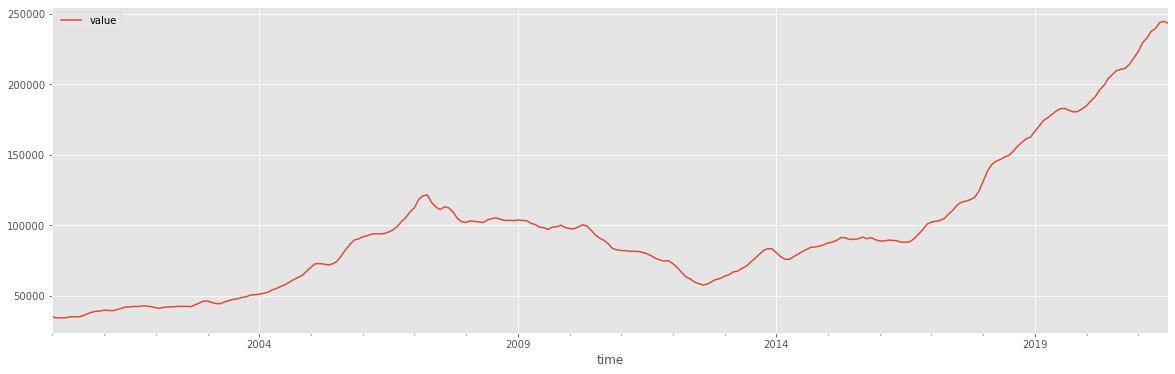

In [53]:
df_19121.plot(figsize=(20,6));

# Baseline Model

In [54]:
naive = df_19121.shift(1)
naive

,value
time,
2000-01-31,NaN
2000-02-29,35211.0
2000-03-31,34351.0
2000-04-30,34498.0
2000-05-31,34373.0
...,...
2021-04-30,232825.0
2021-05-31,237570.0
2021-06-30,239566.0


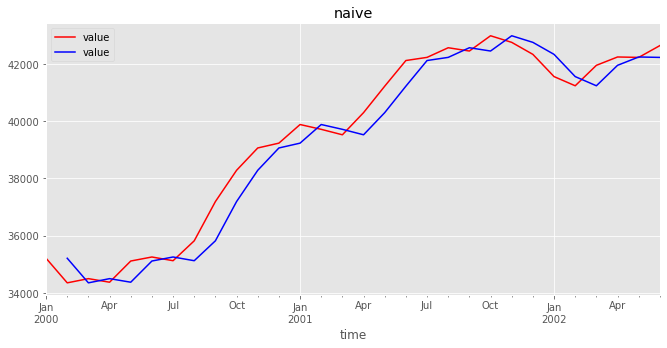

In [55]:
fig, ax = plt.subplots(figsize=(11, 5))

df_19121[0:30].plot(ax=ax, c='r', label='original')
naive[0:30].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [56]:
dftest = adfuller(naive.dropna())
print ('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic', 'p-value', '#Lags Used',
                            'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.164207
p-value                          0.970181
#Lags Used                      13.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


# Modeling

In [14]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test: \n')
dftest = adfuller(df_19121)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print('19121')
print(dfoutput)

Results of Dickey-Fuller Test: 

19121
Test Statistic                   0.034223
p-value                          0.961272
#Lags Used                      14.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


# Check Seaonality

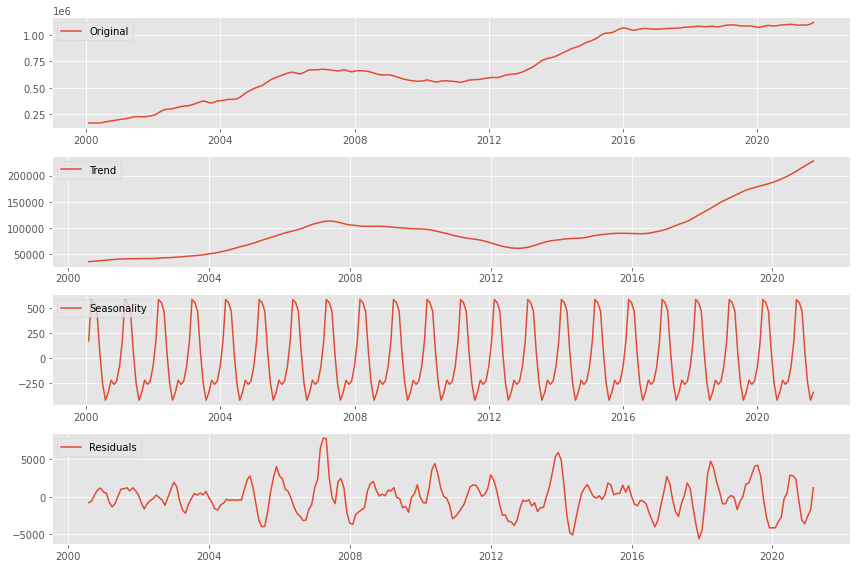

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(df_19121)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_11222, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()


This model has an upward trend with seasonality as well 

# Differencing

We can try to make our model stationary by taking the difference

In [58]:
diff = df_19121.diff().diff().dropna()

dftest = adfuller(diff)
print ('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic', 'p-value', '#Lags Used',
                            'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -8.140698e+00
p-value                        1.030078e-12
#Lags Used                     1.100000e+01
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64



Taking two difference makes our p-value < 0.05. Let's look at autocorrelation.

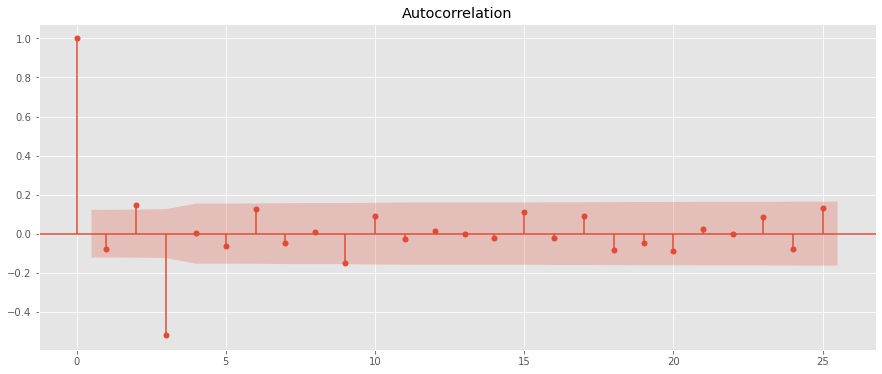

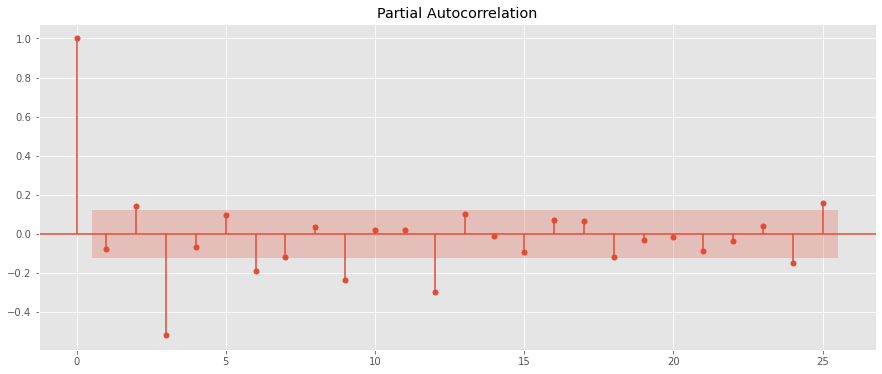

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation Plot
plot_acf(df_19121.diff().diff().dropna());

# Partial Autocorrelation Plot
plot_pacf(df_19121.diff().diff().dropna());

<AxesSubplot:xlabel='time'>

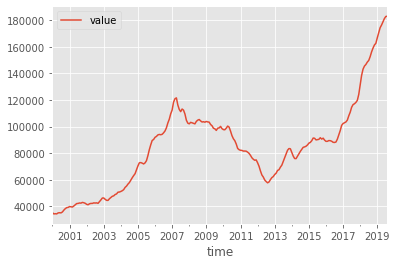

In [15]:
df_19121_train =df_19121[:236]
df_19121_test = df_19121[236:] 
df_19121_train.plot()

# Rolling Mean

<AxesSubplot:xlabel='time'>

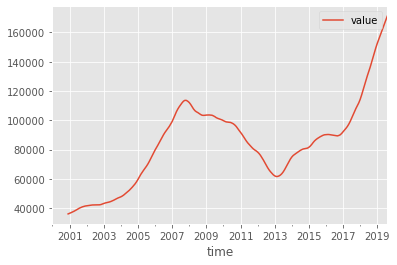

In [16]:
df_19121_train.rolling(12).mean().plot()

# First Order difference

<AxesSubplot:xlabel='time'>

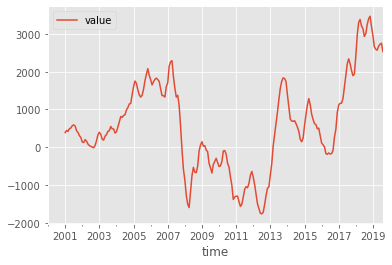

In [17]:
df_19121_train.diff(periods=1).rolling(12).mean().plot()

# Second Order Difference

<AxesSubplot:xlabel='time'>

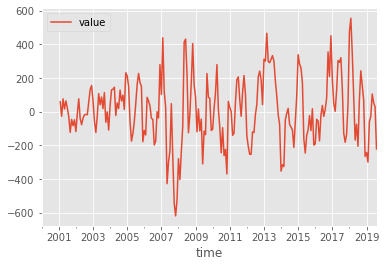

In [18]:
df_19121_train.diff().diff().rolling(12).mean().plot()

In [19]:
# Fit a SARIMAX model on the data set with a first order difference.

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

sm = SARIMAX(endog=df_19121_train, order =(0,1,0)).fit()

/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [21]:
# Calculate the training root mean squared error (same syntax as a linear regression prediction)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(df_19121_train, sm.predict(), squared=False)
rmse

3001.5705267607227

# SARIMAX

To get the best hyperparameters for our model, we created a combination of orders and seasonal orders in the range of 0-2, inclusive.



In [25]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [26]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_19121,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =6741.45398736851
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =6284.179208842668
ARIMA (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =5972.783241826888
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =5550.657369665099
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =5228.791895050792
ARIMA (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =4947.403663403935
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =5167.087703364629
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =4896.63110174933
ARIMA (0, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =4641.495201565425
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =5463.048069478534
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =5405.181930671983
ARIMA (0, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =5144.124824438326
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =5169.205836162521
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =5147.560687013223
ARIMA (0, 0, 0) x (1, 

ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =4314.714275363785
ARIMA (0, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =4111.584139036866
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4189.900762683397
ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =4128.786283108448
ARIMA (0, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =3919.2955605306497
ARIMA (0, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =4156.7732963298085
ARIMA (0, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =3977.284480848572
ARIMA (0, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =3862.525527642058
ARIMA (0, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =4145.825874739368
ARIMA (0, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =4145.713803006019
ARIMA (0, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =4113.584049674026
ARIMA (0, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =3957.05536763862
ARIMA (0, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =3955.1377629512576
ARIMA (0, 1, 1) x (2, 1, 2, 12)12 : AIC Calculated =3919.532334062623
ARIMA (0, 1, 1) x 

ARIMA (0, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =4035.3200510974384
ARIMA (0, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =3986.9939444717443
ARIMA (0, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =3888.647545914777
ARIMA (0, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =3879.2095504439685
ARIMA (0, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =3817.37775704261
ARIMA (0, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =3806.5791141518657
ARIMA (0, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =3731.463689836796
ARIMA (0, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =3683.5054855483377
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =4630.617863084926
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =4420.9468438731255
ARIMA (1, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =4299.883011219801
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =4535.079581218495
ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =4814.675085976702
ARIMA (1, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =4048.8459266501877
ARIMA (1, 0, 0

ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =4210.865121148036
ARIMA (1, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =4015.896562771034
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4344.1101887887
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4060.236020492921
ARIMA (1, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =3845.484164898948
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =4386.719431266631
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =3962.775757540866
ARIMA (1, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =3708.184995538518
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =4227.1073932417885
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =4212.761682892546
ARIMA (1, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =4016.4976803884756
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =4110.323518390494
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =4062.184823754464
ARIMA (1, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =3840.7025738711045
ARIMA (1, 1, 1) x (

ARIMA (1, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =4109.66130419715
ARIMA (1, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =3915.874392420906
ARIMA (1, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =4092.8447420685143
ARIMA (1, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =3967.660128563657
ARIMA (1, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =3751.4476284642706
ARIMA (1, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =4103.606777648146
ARIMA (1, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =3897.3773692511927
ARIMA (1, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =3638.3250919261864
ARIMA (1, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =3947.6128944812394
ARIMA (1, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =3949.5934764129383
ARIMA (1, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =3929.454228997837
ARIMA (1, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =3849.086312550279
ARIMA (1, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =3787.0568919094685
ARIMA (1, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =3769.7605595785453
ARIMA (1, 2, 

ARIMA (2, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =4016.4770675399386
ARIMA (2, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =4018.2401664098775
ARIMA (2, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =3848.674664531208
ARIMA (2, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =3848.183471420412
ARIMA (2, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =3848.1785807616266
ARIMA (2, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =3761.4296953825447
ARIMA (2, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =3696.6662758778966
ARIMA (2, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =3696.4113137934646
ARIMA (2, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =4415.785019167379
ARIMA (2, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =4210.014663180738
ARIMA (2, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =4014.724081131028
ARIMA (2, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4343.149374287241
ARIMA (2, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =4068.3161592577267
ARIMA (2, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =3847.8451421387263
ARIMA (2, 1,

ARIMA (2, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =4095.1186739628442
ARIMA (2, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =3904.0517330937255
ARIMA (2, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =4301.567471428774
ARIMA (2, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =3960.4351141211614
ARIMA (2, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =3741.5440560362513
ARIMA (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =4324.740490382605
ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =3926.465447968737
ARIMA (2, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =3792.2267395803856
ARIMA (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =4110.948909398456
ARIMA (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =4096.942485567772
ARIMA (2, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =3904.8055959410995
ARIMA (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =4056.813530781038
ARIMA (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =3942.2186883425675
ARIMA (2, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =3740.800265640868
ARIMA (2, 2, 

In [24]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

NameError: name 'ans' is not defined

From the combination, our SARIMAX model with order=(0,1,2) and seasonal_order=(1, 2, 2, 12) got the lowest aic score, which was 4228.479308

Now, we can use those hyperparameters for our final model to predict future home values.



In [27]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = SARIMAX(df_19121, 
                                        order=(0, 1, 2), 
                                        seasonal_order=(1, 2, 2, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/avijames/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9998      0.048     20.902      0.000       0.906       1.094
ma.L2          0.9974      0.088     11.359      0.000       0.825       1.169
ar.S.L12       0.1658      0.033      5.006      0.000       0.101       0.231
ma.S.L12      -1.5876      0.071    -22.371      0.000      -1.727      -1.449
ma.S.L24       0.6366      0.062     10.317      0.000       0.516       0.758
sigma2      1.412e+06   7.69e-08   1.84e+13      0.000    1.41e+06    1.41e+06


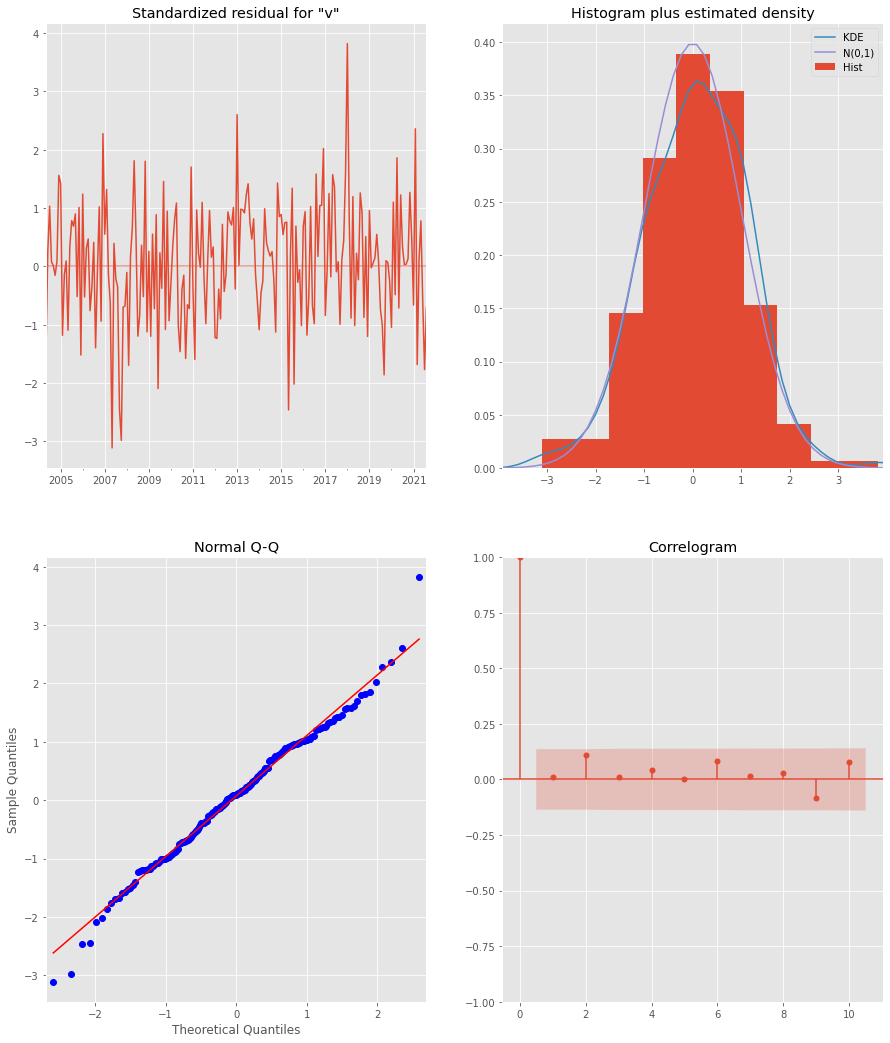

In [28]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

The first plot shows that the some residuals are normally distributed. The top right plot shows that the data seems normally distributed. The bottom left plot shows that the residuals follow the linear trend from a standard normal distribution. The bottom right plot shows that the autocorrelation.

# Validating the Model¶

We will validate the last 2 years starting from January 2019

In [29]:
# Get predictions starting from 01-31-2019 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2019-01-31'), dynamic=False)
pred_conf = pred.conf_int()

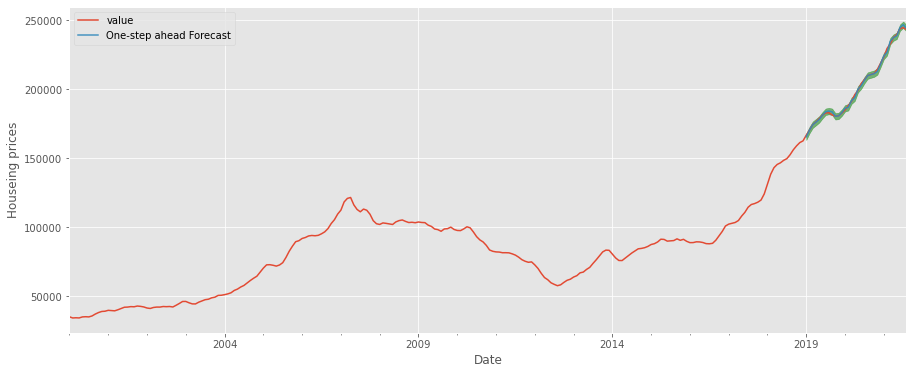

In [30]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = df_19121.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Houseing prices')
plt.legend()

plt.show()

In [31]:
# Get the real and predicted values
df19121_forecasted = pred.predicted_mean
df19121_truth = df_19121['value']['2019-01-31':]

# Compute the mean square error
mse = ((df19121_forecasted - df19121_truth) ** 2).mean()
rmse =np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 1158.33


# Dynamic Forecasting

In [32]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

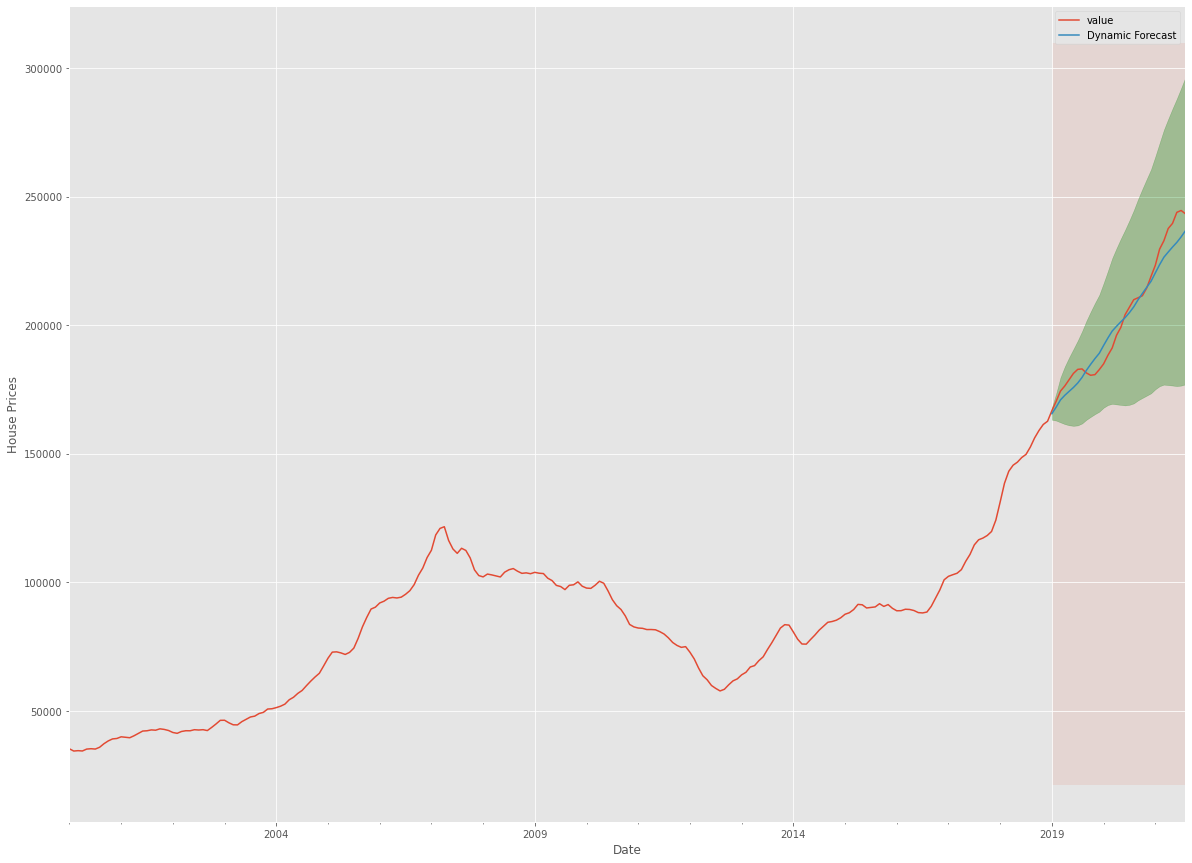

In [33]:
# Plot the dynamic forecast with confidence intervals.

ax = df_19121.plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-01-31'), df19121_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('House Prices')

plt.legend()
plt.show()

# Producing and Visualizing Forecasts

In [34]:

# Get forecast 100 steps ahead in future
prediction = output.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

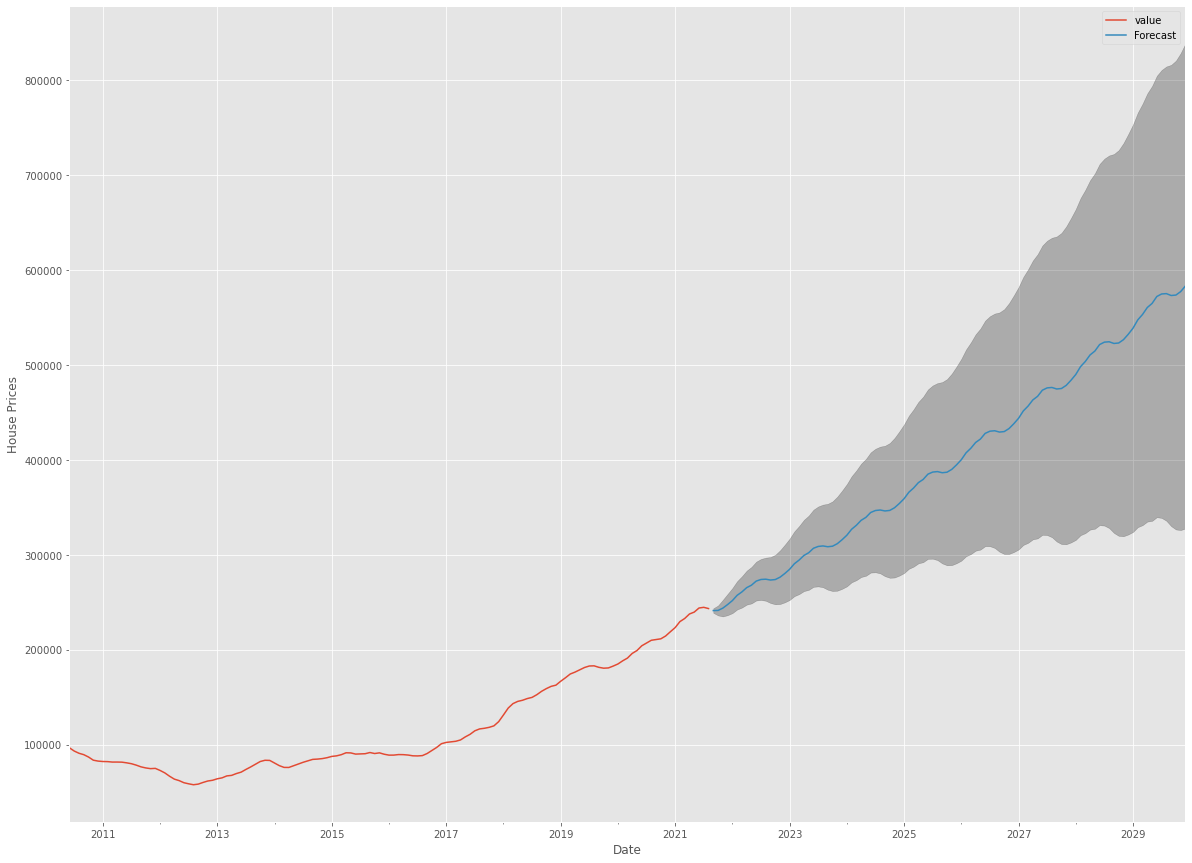

In [40]:
# Plot future predictions with confidence intervals
ax = df_19121.iloc[125:].plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('House Prices')

plt.legend()
plt.show()